In [2]:
Use Logistic Regression to classify a tumor is malignant or benign and 
tabulate results for different threshold input parameters. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing our cancer dataset
dataset = pd.read_csv('breast-cancer.csv')

In [7]:
dataset.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [8]:
X = dataset[dataset.columns[1:10]] 

In [10]:
X.head()

,5,1,1.1,1.2,2,1.3,3,1.4,1.5
0,5,4,4,5,7,10,3,2,1
1,3,1,1,1,2,2,3,1,1
2,6,8,8,1,3,4,3,7,1
3,4,1,1,3,2,1,3,1,1
4,8,10,10,8,7,10,9,7,1


In [34]:
X.shape
X = X.replace(to_replace ="?", 
                 value = 0) 
X.head()

,5,1,1.1,1.2,2,1.3,3,1.4,1.5
0,5,4,4,5,7,10,3,2,1
1,3,1,1,1,2,2,3,1,1
2,6,8,8,1,3,4,3,7,1
3,4,1,1,3,2,1,3,1,1
4,8,10,10,8,7,10,9,7,1


In [35]:
Y = dataset[dataset.columns[10]]
Y = Y.replace(to_replace = "?", 
                 value = 0) 
Y.head()

0    2
1    2
2    2
3    2
4    4
Name: 2.1, dtype: int64

In [36]:
Y.shape

(698,)

In [37]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y_binary = labelencoder_Y.fit_transform(Y)


In [38]:
Y_binary

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
model = classifier.fit(X_train, Y_train)

c:\users\sravya bhaskara\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
mythreshold = 0.5

In [77]:
decisions = (model.predict_proba(X_test))
decisions = decisions[:, [0]]
decisions

array([[7.06671681e-02],
       [9.74419440e-01],
       [1.20676119e-02],
       [1.64119383e-01],
       [9.82657909e-01],
       [9.79791438e-01],
       [5.22497545e-01],
       [9.32084307e-01],
       [9.77224931e-01],
       [9.78030814e-01],
       [9.63930107e-01],
       [9.68975180e-01],
       [9.75461698e-01],
       [9.50812526e-01],
       [9.60943342e-01],
       [9.82657909e-01],
       [9.26328141e-01],
       [9.81441109e-01],
       [1.75894241e-02],
       [3.68734594e-03],
       [9.87098701e-01],
       [6.49082459e-03],
       [1.68367238e-04],
       [2.03615666e-02],
       [9.74419440e-01],
       [2.21904030e-03],
       [3.48716750e-03],
       [2.56994251e-02],
       [6.38167284e-01],
       [9.85123961e-01],
       [1.39455305e-02],
       [9.57402349e-01],
       [9.47115120e-01],
       [9.50959250e-01],
       [9.68975180e-01],
       [9.61147973e-01],
       [9.47272261e-01],
       [6.64354803e-03],
       [9.85123961e-01],
       [9.78929112e-01],


In [84]:
decisions.shape
result = decisions.flatten()

# Set threshold to 0.5

In [87]:
Y_pred = np.where(result<0.5,4,2)
Y_pred

array([4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4,
       4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 2, 4,
       4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2,
       2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4,
       2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4,
       2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4])

In [88]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [89]:
cm

array([[105,   3],
       [  4,  63]], dtype=int64)

In [90]:
from sklearn import metrics
a = metrics.accuracy_score(Y_test, Y_pred)
a

0.96

# Set threshold to 0.4

In [92]:
Y_pred = np.where(result<0.4,4,2)
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[106,   2],
       [  4,  63]], dtype=int64)

In [93]:
a = metrics.accuracy_score(Y_test, Y_pred)
a

0.9657142857142857

# Set threshold to 0.6

In [95]:
Y_pred = np.where(result<0.6,4,2)
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[104,   4],
       [  1,  66]], dtype=int64)

In [96]:
a = metrics.accuracy_score(Y_test, Y_pred)
a

0.9714285714285714

# ROC Characteristics

In [98]:

a = np.where(Y_pred == 2,0,1)
b = np.where(Y_test == 2,0,1)

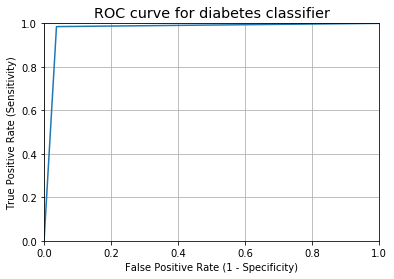

In [99]:
fpr, tpr, thresholds = metrics.roc_curve(b, a)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# AUC curve

In [100]:
print(metrics.roc_auc_score(b, a))

0.9740187949143174
